In [1]:
# 한글 깨짐 방지
import os
import csv
import numpy as np # 배열 기반 데이터 처리 패키지, 선형대수(행렬) 처리
import matplotlib  # 시각화 패키지
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

font_name = font_manager.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name()
# windows 10
# font_name = font_manager.FontProperties(fname="C:/Windows/Fonts/malgunsl.ttf").get_name()
rc('font', family=font_name)           # 맑은 고딕 폰트 지정
plt.rcParams["font.size"] = 12         # 글자 크기
# plt.rcParams["figure.figsize"] = (10, 4) # 10:4의 그래프 비율
plt.rcParams['axes.unicode_minus'] = False  # minus 부호는 unicode 적용시 한글이 깨짐으로 설정

# Jupyter에게 matplotlib 그래프를 출력 영역에 표시할 것을 지시하는 명령
%matplotlib inline  

In [4]:
# 1) 데이터 3건만 출력
f = open('./subwaytime_202001.csv', 'r', encoding='utf-8')
data = csv.reader(f, delimiter=",")
header1 = next(data)
header2 = next(data)

for i in range(3):
    print(next(data))
f.close()

['2020-01', '1호선', '0150', '서울역', '908', '18', '8,948', '7,940', '13,146', '47,332', '37,251', '97,250', '73,760', '215,532', '59,560', '154,516', '62,210', '81,701', '84,168', '78,587', '95,413', '87,412', '97,657', '86,682', '79,714', '81,939', '110,255', '84,777', '116,037', '88,708', '161,071', '94,176', '235,016', '101,321', '129,251', '75,233', '91,567', '51,782', '91,732', '42,762', '66,846', '33,404', '31,466', '17,549', '4,190', '5,633', '98', '291', '0', '8', '0', '0', '2020-02-03 12:20:06']
['2020-01', '1호선', '0151', '시청', '55', '0', '1,999', '3,976', '3,497', '19,177', '7,417', '60,452', '9,330', '192,100', '11,934', '83,874', '14,763', '45,181', '20,957', '45,937', '24,807', '44,684', '30,626', '46,711', '38,849', '41,838', '51,606', '33,414', '58,397', '27,894', '77,658', '26,527', '158,475', '26,415', '66,799', '15,223', '52,413', '8,853', '53,343', '7,879', '34,039', '5,823', '12,937', '3,747', '556', '1,063', '7', '38', '0', '0', '0', '0', '2020-02-03 12:20:06']
['2020

In [8]:
# 2) 7시 ~ 8시 사이의 출근 시간만 승차인원 출력
f = open('./subwaytime_202001.csv', 'r', encoding='utf-8')
data = csv.reader(f, delimiter=',')
next(data)
next(data)
for row in data:
    print(' ', row[10], end='') # 11번째 07:00:00~07:59:59

f.close()

  37,251  7,417  6,286  5,495  4,956  13,096  17,886  19,985  39,773  5,512  5,256  8,316  5,569  3,367  6,808  25,551  36,487  25,993  5,773  19,267  22,103  53,568  63,129  83,750  36,021  113,517  52,905  16,755  16,923  20,973  14,936  44,628  26,311  14,299  22,320  72,384  78,292  128,194  80,680  211,459  89,155  139,244  65,619  135,727  41,022  40,854  44,121  42,456  66,585  36,635  16,984  25,172  15,708  7,216  6,195  2,847  2,674  31,158  40,239  4,720  8,007  85,719  132,452  49,435  54,883  57,109  14,357  15,266  13,708  5,757  1,922  2,022  1  4,760  22,711  24,734  22,711  15,314  11,504  14,770  25,475  7,590  26,349  32,275  13,541  8,031  23,160  3,347  24,772  20,281  33,443  18,981  21,327  23,856  48,450  90,212  54,008  94,913  124,983  111,160  48,799  92,891  80,938  47,143  30,629  17,427  5,388  7,473  9,655  5,630  5,741  11,764  15,834  4,970  10,178  11,895  4,560  44,415  68,806  2,592  8,314  11,406  21,543  16,835  28,821  39,150  9,258  23,051  37,23

In [9]:
# 3) 6시 ~ 9시 사이의  출근 시간에 가장 많은 승하차 인원이 있는역은?
# 06:00:00~06:59:59 ~ 08:00:00~08:59:59: index 8 ~ 13
f = open('./subwaytime_202001.csv', 'r', encoding='utf-8')
data = csv.reader(f, delimiter=',')
next(data)
next(data)
mx = 0  # 인원
mx_station = '' # 역이름

for row in data:
    for i in range(8, 14): # 8 ~ 13
        row[i] = int(row[i].replace(',', '')) 
        
    # row[8:14] = map(int, row[8:14]) # map(함수명, 함수를 적용할 데이터)
    tot = sum(row[8:14])
    if mx < tot:
        mx = tot
        mx_station = row[3] + '(' + row[1]+')'
        # print(len(row))

print('{0} {1:,} 명'.format(mx_station, mx)) 

f.close()

구로디지털단지(2호선) 730,264 명


In [18]:
# 4) 시간을 입력받아 가장 많은 승하차 인원이 있는 역을 출력할것.       
f = open('./subwaytime_202001.csv', 'r', encoding='utf-8')
data = csv.reader(f, delimiter=',')
next(data)
next(data)
mx = 0
mx_station = ''
t = int(input('승차인원이 가장 많은 역을 위한 시간 입력: '))

for row in data :
    for i in range(4, len(row)-1): # 4 ~ 51
        row[i] = int(row[i].replace(',', '')) 
    if t >= 1 and t <= 3:
        cnt = row[2*t + 44]
    else:
        cnt = row[2 * t - 4] # row[2 * 23 - 4] --> row[46 - 4] --> row[42]
    if mx < cnt :
        mx = cnt
        mx_station = row[3] + '(' + row[1] + ')'
print(mx_station, mx)
f.close()

승차인원이 가장 많은 역을 위한 시간 입력: 2
대림(구로구청)(2호선) 9


In [16]:
for i in range(53):
    print(i, header1[i], header2[i])
    # 4: 4
    # 5: 6
    # 6: 8
    # 24: 44
    # 3: 50
    # 4 ~ 24, 1, 2, 3

0 사용월 
1 호선명 
2 역ID 
3 지하철역 
4 04:00:00~04:59:59 승차
5  하차
6 05:00:00~05:59:59 승차
7  하차
8 06:00:00~06:59:59 승차
9  하차
10 07:00:00~07:59:59 승차
11  하차
12 08:00:00~08:59:59 승차
13  하차
14 09:00:00~09:59:59 승차
15  하차
16 10:00:00~10:59:59 승차
17  하차
18 11:00:00~11:59:59 승차
19  하차
20 12:00:00~12:59:59 승차
21  하차
22 13:00:00~13:59:59 승차
23  하차
24 14:00:00~14:59:59 승차
25  하차
26 15:00:00~15:59:59 승차
27  하차
28 16:00:00~16:59:59 승차
29  하차
30 17:00:00~17:59:59 승차
31  하차
32 18:00:00~18:59:59 승차
33  하차
34 19:00:00~19:59:59 승차
35  하차
36 20:00:00~20:59:59 승차
37  하차
38 21:00:00~21:59:59 승차
39  하차
40 22:00:00~22:59:59 승차
41  하차
42 23:00:00~23:59:59 승차
43  하차
44 00:00:00~00:59:59 승차
45  하차
46 01:00:00~01:59:59 승차
47  하차
48 02:00:00~02:59:59 승차
49  하차
50 03:00:00~03:59:59 승차
51  하차
52 작업일시 


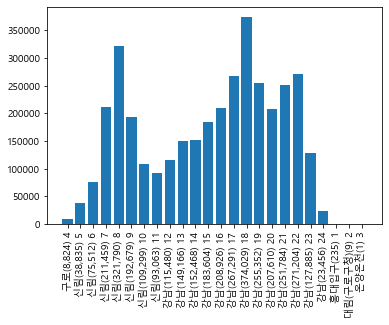

In [21]:
# 5) 시간대별로 가장 많은 승차 인원이 있는 역이름과 인원을 출력할것.
f = open('./subwaytime_202001.csv', 'r', encoding='utf-8')
data = csv.reader(f, delimiter=',')
next(data)
next(data)
mx = [0] * 24          # 24 시간
mx_station = [''] * 24 # 24개의 역이름

for row in data :
    for i in range(4, len(row)-1): # 4 ~ 51
        row[i] = int(row[i].replace(',', '')) 
    
    # 4시 ~ 24시
    for j in range(21) : # 0 ~ 20
        cnt = row[j * 2 + 4] # row[4], row[6], row[8]... ~ row[50]
        if mx[j] < cnt :
            mx[j] = cnt # 더 큰 승차인원을 새로 할당
            # 역이름 + 승차 인원 + 시간
            mx_station[j] = row[3] + '('+ format(cnt, ",")+') ' + str(j+4) 

    # 1시 ~ 3시
    for j in range(21, 24) : # 21 ~ 23
        cnt = row[j * 2 + 4] # row[4], row[6], row[8]... ~ row[50]
        if mx[j] < cnt :
            mx[j] = cnt # 더 큰 승차인원을 새로 할당
            # 역이름 + 승차 인원 + 시간
            mx_station[j] = row[3] + '('+ format(cnt, ",")+') ' + str((j+4)-24) 

            
# print(mx_station)
# print(mx)

plt.rc('font', family ='Malgun Gothic')
#plt.figure(dpi = 300)
# xlim = []
# for h in range(4, 25):
#     xlim.append(h)

# xlim = xlim + [1, 2, 3]

plt.bar(range(24), mx) # 수직 막대 그래프
plt.xticks(range(24), mx_station, rotation = 90) # x label
plt.show()
f.close()

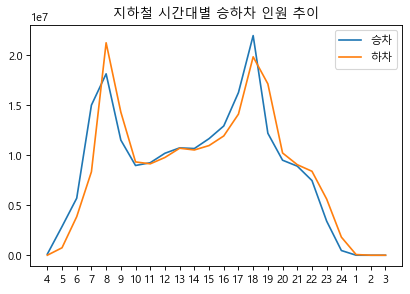

In [20]:
# 6) 지하철 시간대별 승하차 인원 추이
f = open('./subwaytime_202001.csv', 'r', encoding='utf-8')
data = csv.reader(f, delimiter=',')
next(data)
next(data)
s_in = [0] * 24   # 승차 인원
s_out = [0] * 24 # 하차 인원
for row in data :
    for i in range(4, len(row)-1): # 4 ~ 51
        row[i] = int(row[i].replace(',', '')) 
    for i in range(24) : #0 ~ 23
        s_in[i] += row[4 + i * 2]  # 시간대별 승차 인원
        s_out[i] += row[5 + i * 2] # 시간대별 하차 인원
        
plt.figure(dpi = 80)
plt.rc('font', family = 'Malgun Gothic')
plt.title('지하철 시간대별 승하차 인원 추이')
plt.plot(s_in, label = '승차')
plt.plot(s_out, label = '하차')
plt.legend()
xlim = []
for h in range(4, 25):
    xlim.append(h)

xlim = xlim + [1, 2, 3]
plt.xticks(range(24), xlim)
plt.show()
f.close()